# Exploratory Data Analysis

In [26]:
import pandas as pd

In [27]:
from orbit_generation.dataset import get_orbit_features_from_folder, get_segmented_dataset, get_first_period_dataset
from orbit_generation.data import sample_orbits
from orbit_generation.propagation import calculate_errors
from orbit_generation.constants import MU, ORBIT_CLASS_DF
from orbit_generation.visualize import plot_grouped_features, plot_value_proportions

## Number of Orbits

In [28]:
file_path = '/orbit-generation/data/orbits_dt_0_01/'
df = get_orbit_features_from_folder(file_path)
df.shape

(267157, 13)

In [29]:
df.head()

,id_class,x_0,y_0,x_0,vx_0,vy_0,vz_0,jacobi,period,stability,propagated_periods,original_index,system
0,1.0,0.998443,8.192904e-21,0.062769,-0.000818,-0.000284,0.031189,2.995092,12.548964,7973.697790,2.0,0,SaE
1,1.0,0.998443,8.192724e-21,0.062807,-0.000817,-0.000282,0.031084,2.995094,12.548956,7973.492381,2.0,1,SaE
2,1.0,0.998442,8.191912e-21,0.062844,-0.000815,-0.000280,0.030980,2.995096,12.548948,7973.261582,2.0,2,SaE
3,1.0,0.998441,8.191501e-21,0.062882,-0.000813,-0.000278,0.030875,2.995098,12.548939,7973.044450,2.0,3,SaE
4,1.0,0.998441,8.190985e-21,0.062919,-0.000811,-0.000277,0.030771,2.995099,12.548931,7972.818655,2.0,4,SaE


In [30]:
df['system'].value_counts()

EM     44112
SaT    42062
JE     40411
SE     39817
SaE    36119
MP     34269
SM     30367
Name: system, dtype: int64

## Orbit Classification

In [31]:
ORBIT_CLASS_DF.head(50)

,Id,Label,Type,Subtype,Direction
0,1,S_BN,System-wide,Butterfly,North
1,2,S_BS,System-wide,Butterfly,South
2,3,S_DN,System-wide,Dragonfly,North
3,4,S_DPO,System-wide,Distant Prograde,Planar
4,5,S_DRO,System-wide,Distant Retrograde,Planar
5,6,S_DS,System-wide,Dragonfly,South
6,7,S_L1_A,L1,Axial,No specification
7,8,S_L1_HN,L1,Halo,North
8,9,S_L1_HS,L1,Halo,South
9,10,S_L1_L,L1,Lyapunov,Planar


### Total Classes

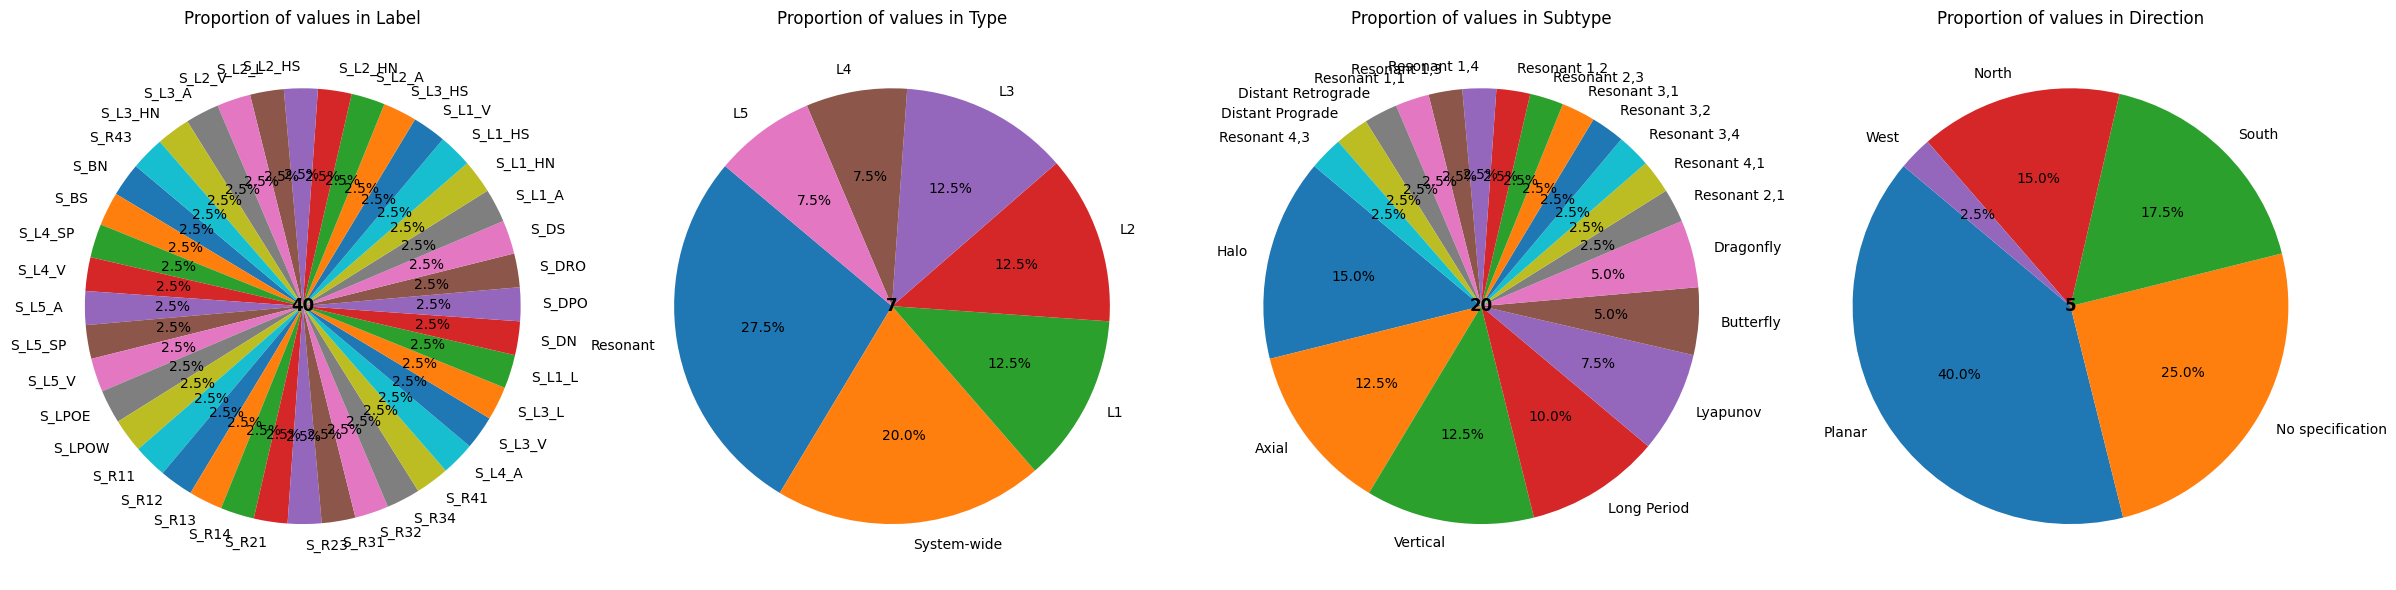

In [32]:
plot_value_proportions(df=ORBIT_CLASS_DF, values_list=df['id_class'].to_list(), id_col='Id')

### Classes by System

System EM


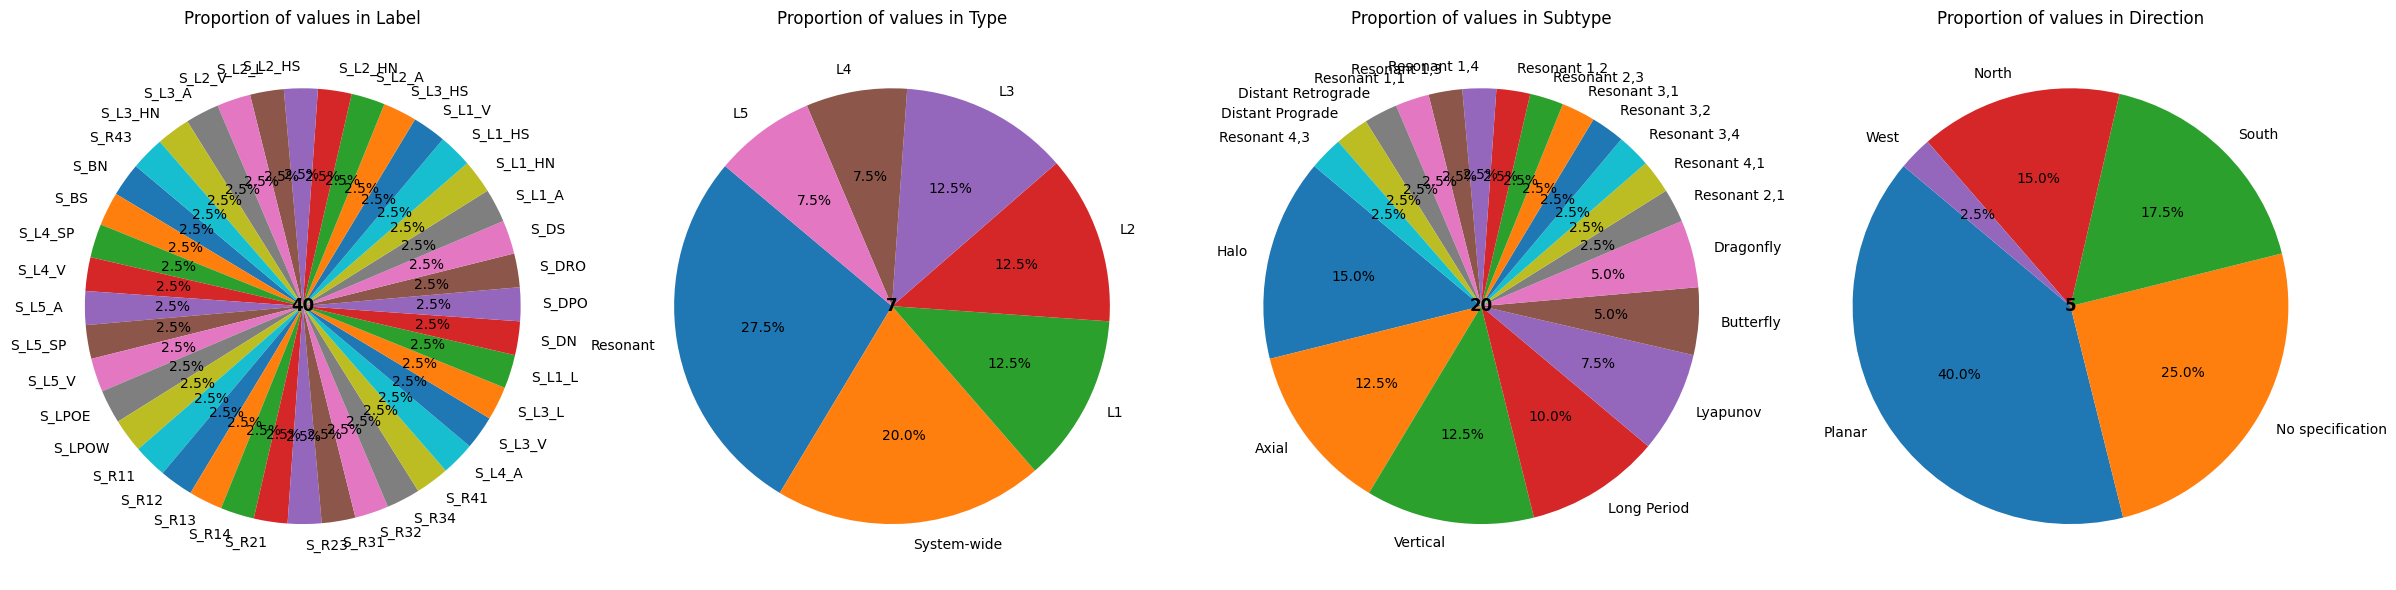

System JE


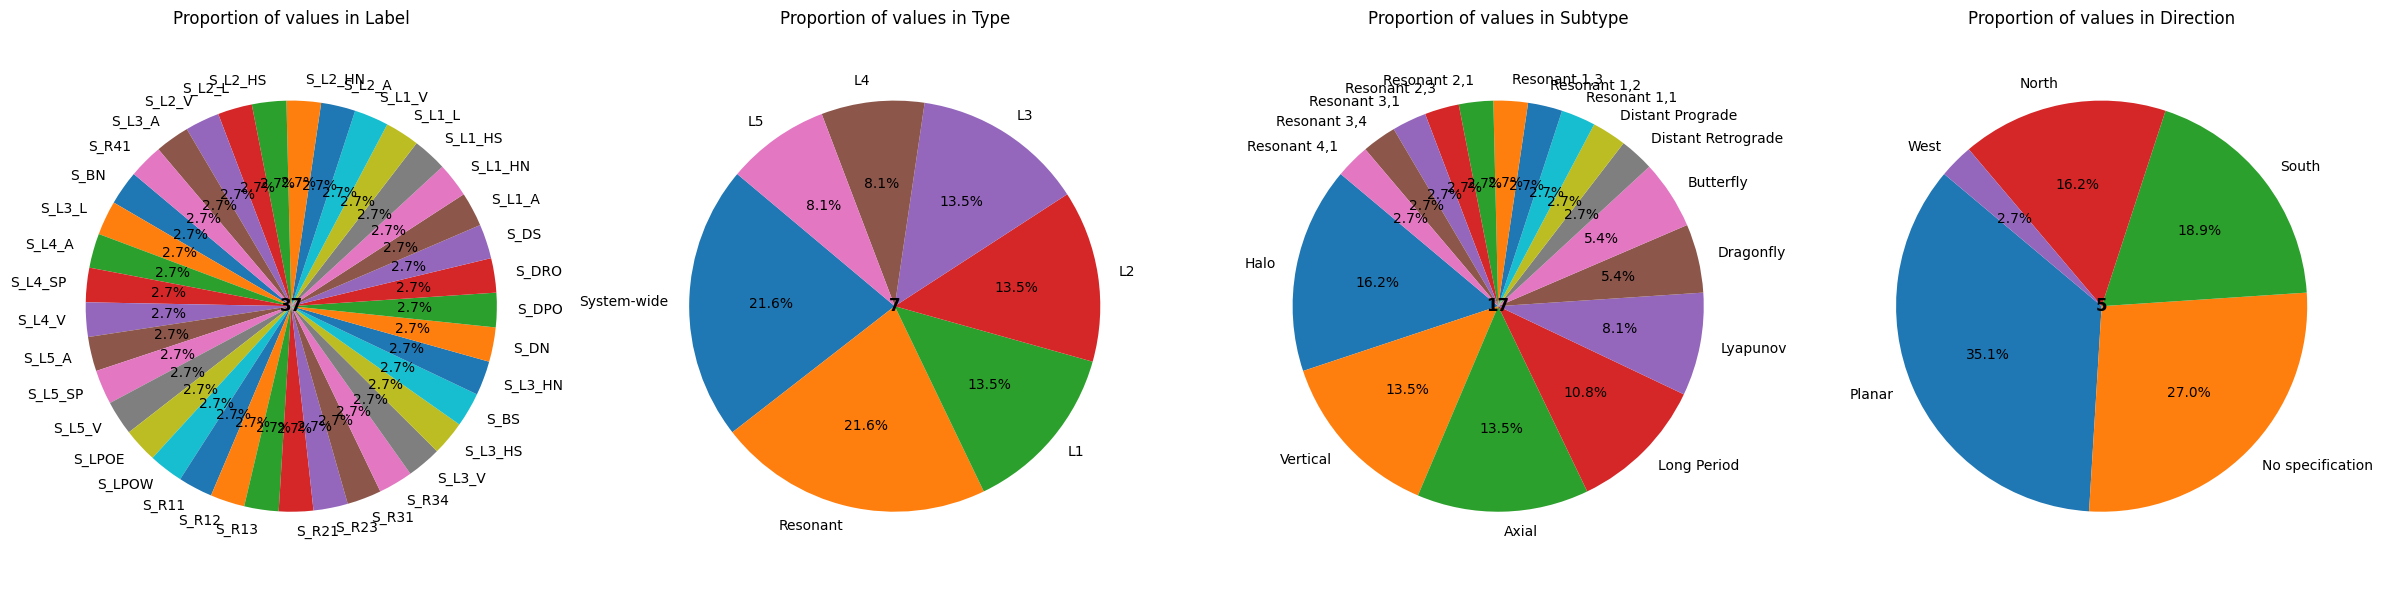

System MP


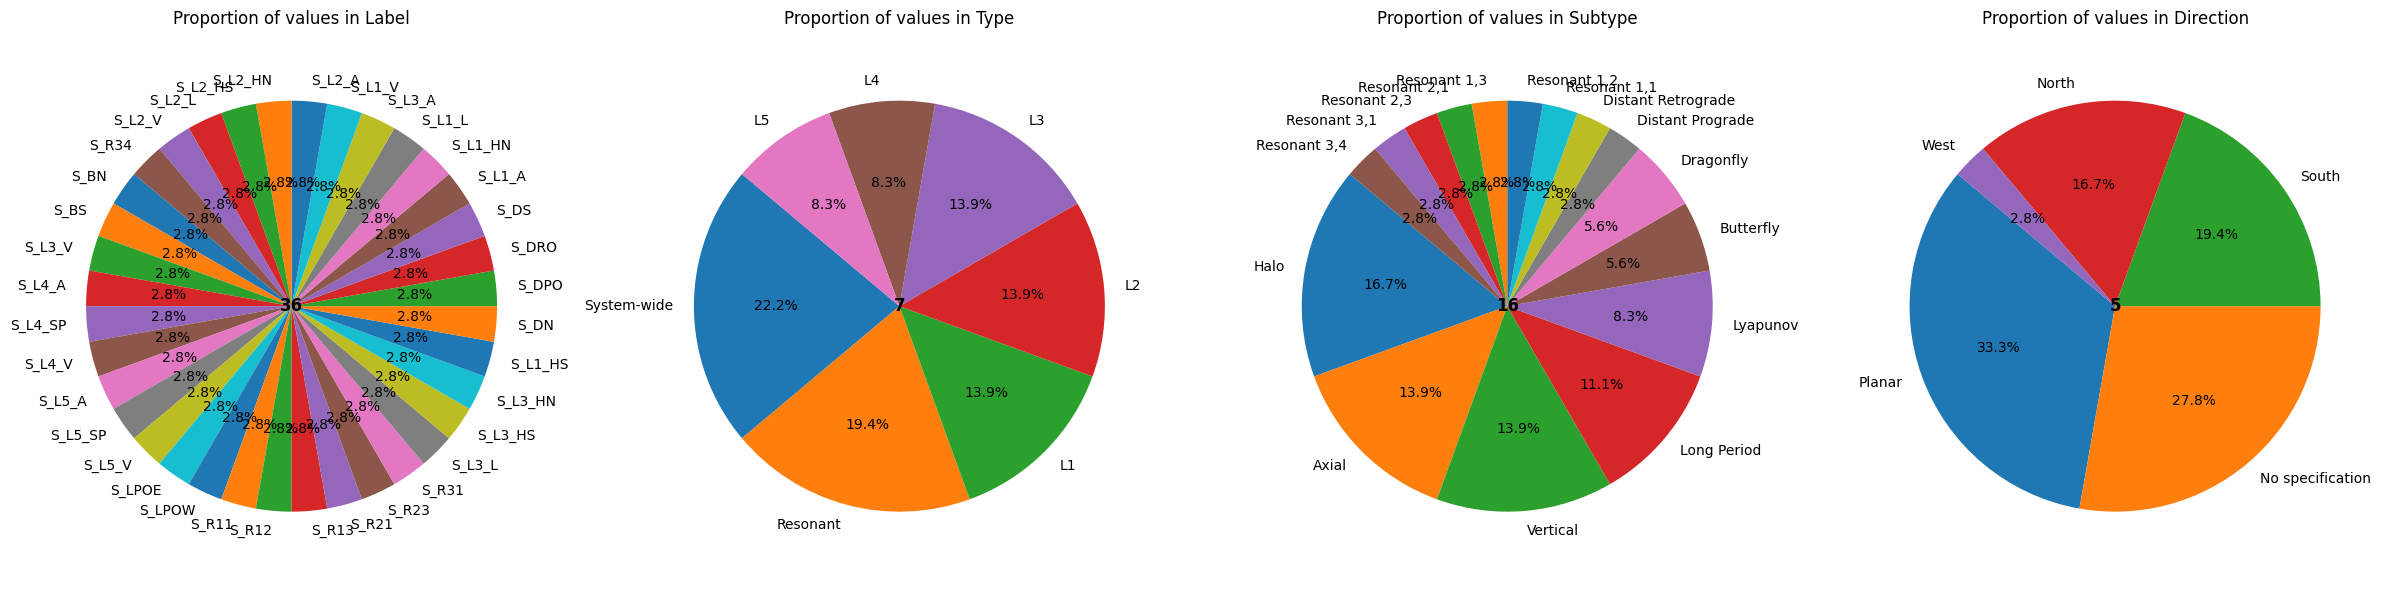

System SE


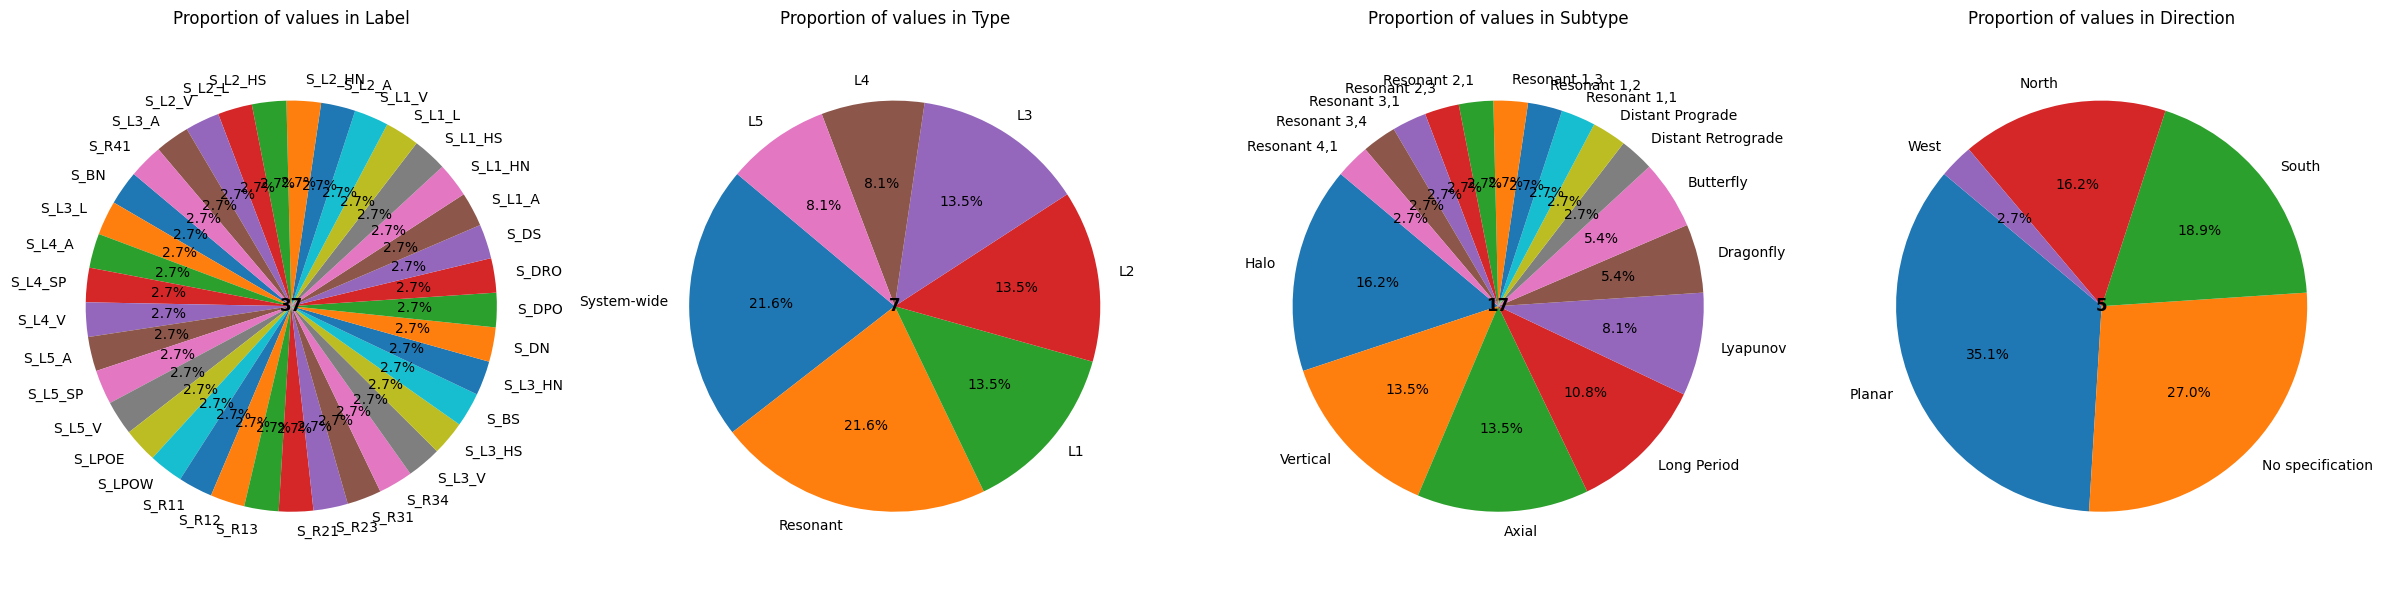

System SM


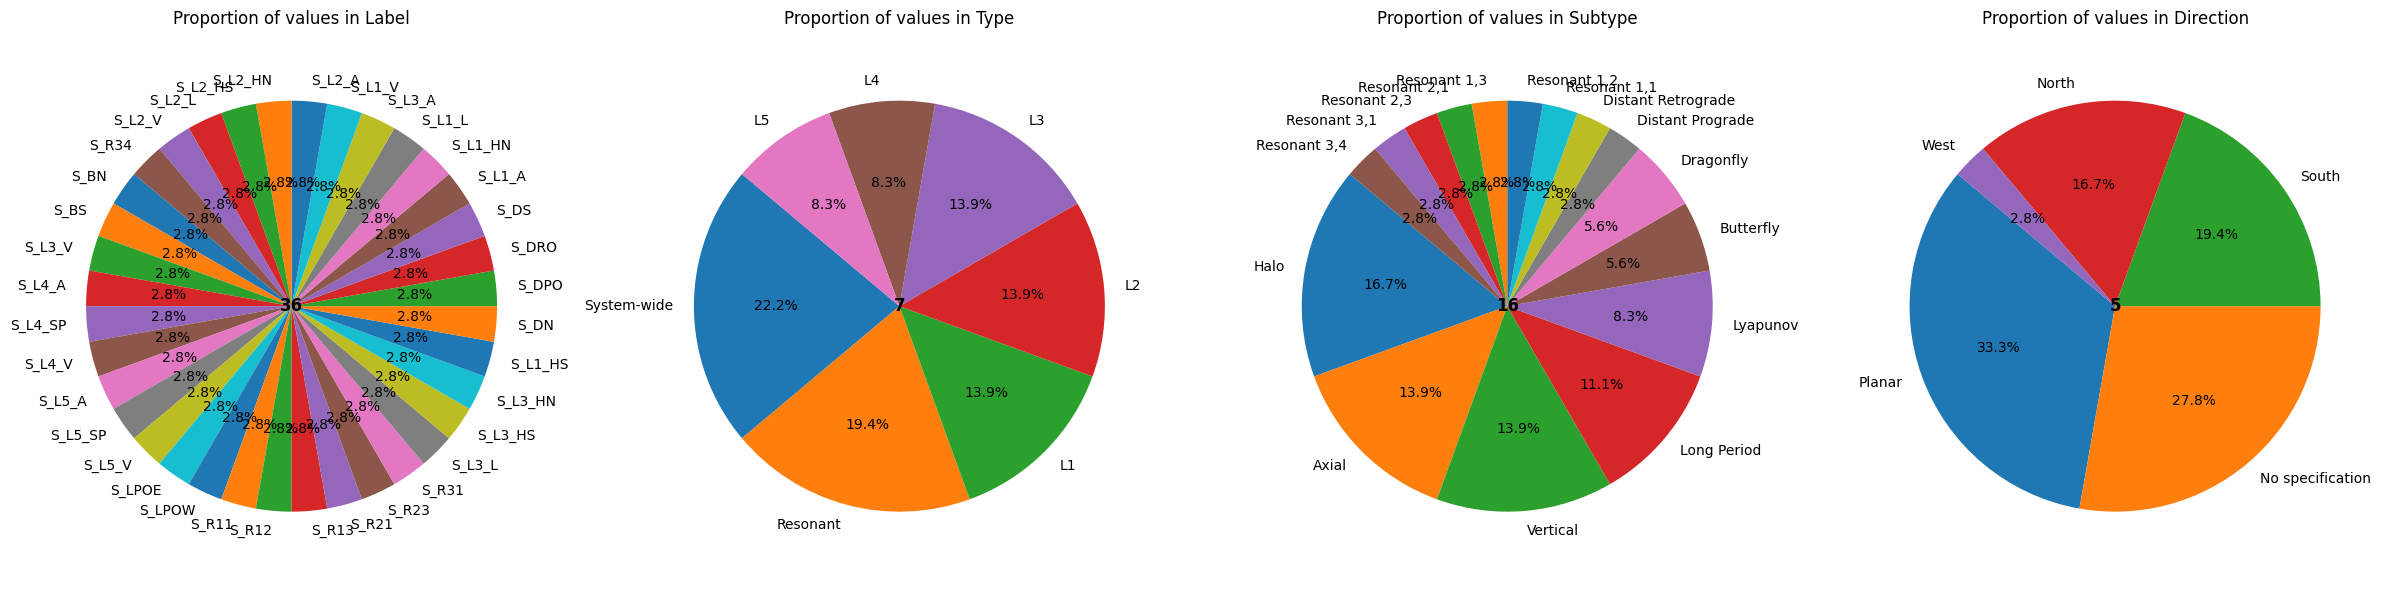

System SaE


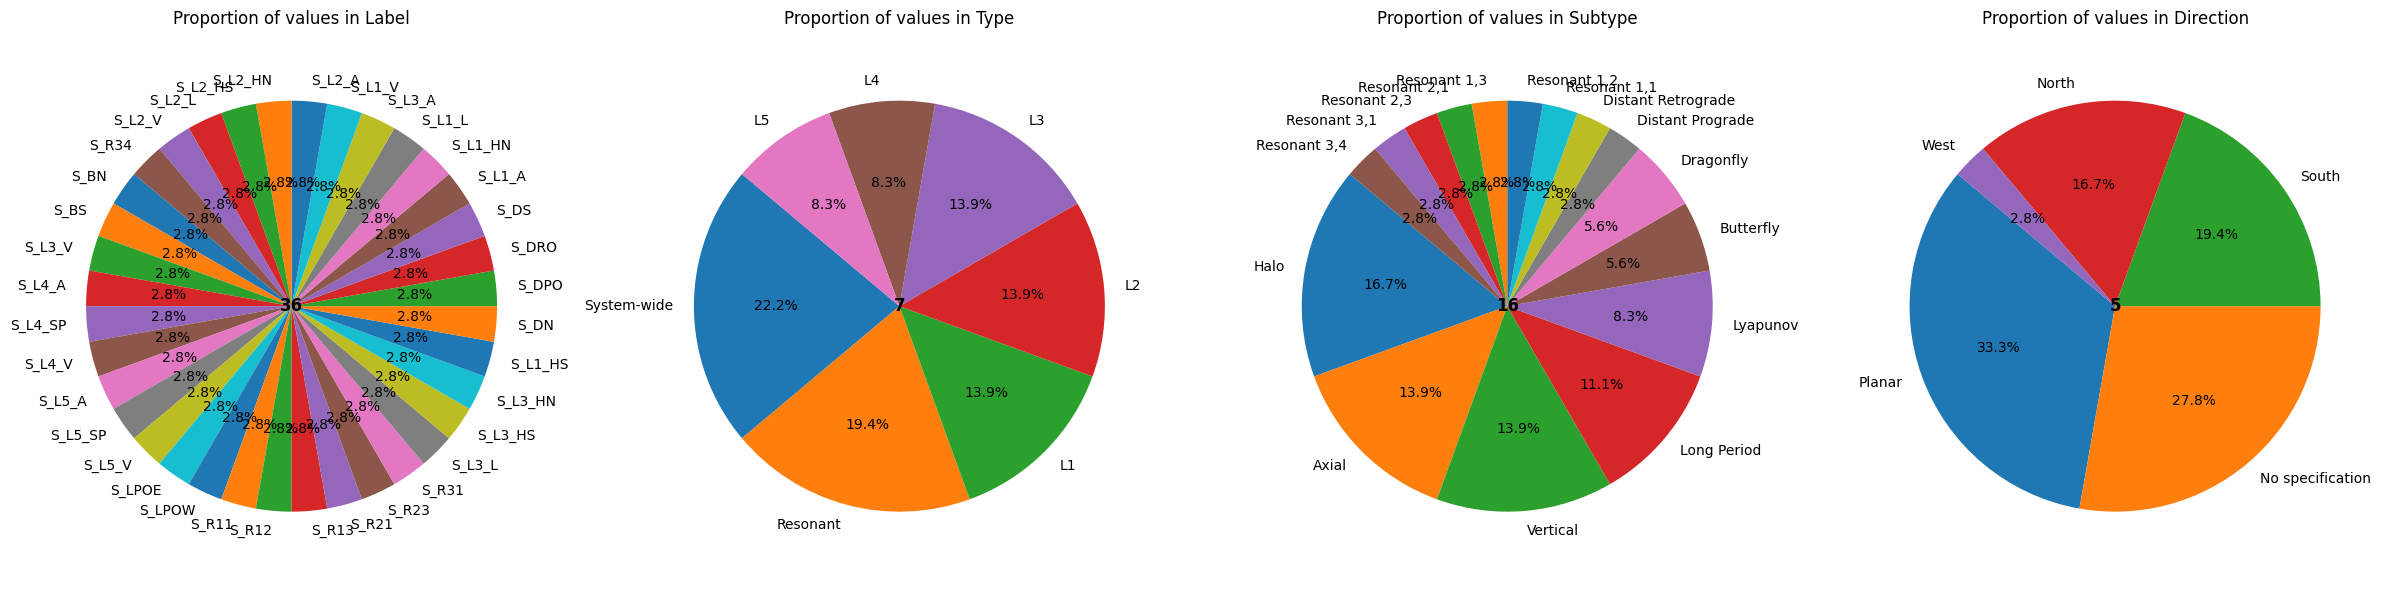

System SaT


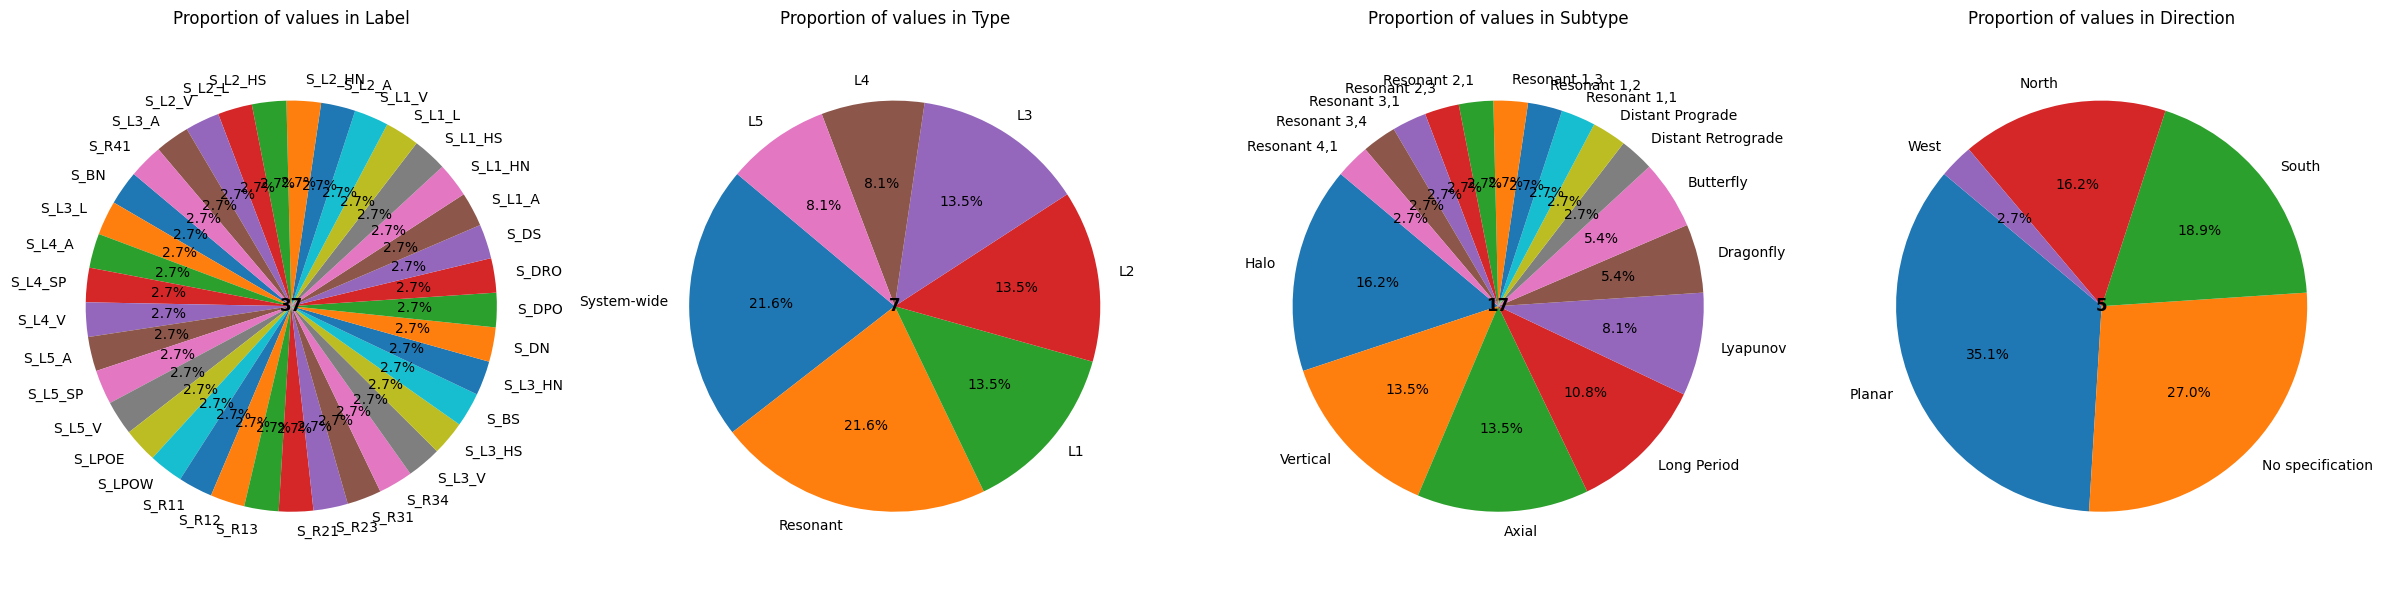

In [33]:
grouped = df.groupby('system')

for group_name, group_df in grouped:
    print(f"System {group_name}")
    plot_value_proportions(df=ORBIT_CLASS_DF, values_list=group_df['id_class'].to_list(), id_col='Id')

## Orbit Features

In [34]:
orbit_df_with_classes = pd.merge(df, ORBIT_CLASS_DF, how='left', left_on='id_class', right_on='Id')

### By System

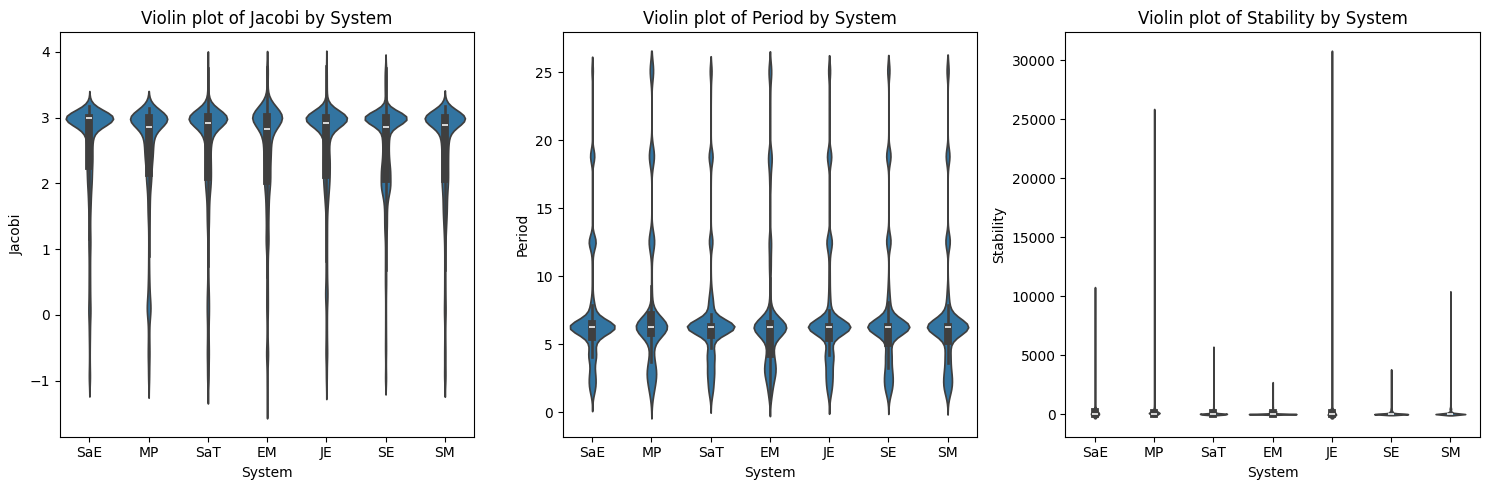

In [35]:
plot_grouped_features(df=orbit_df_with_classes, columns=['jacobi', 'period', 'stability'], group_col='system', plot_type='violin')

### By Big Family

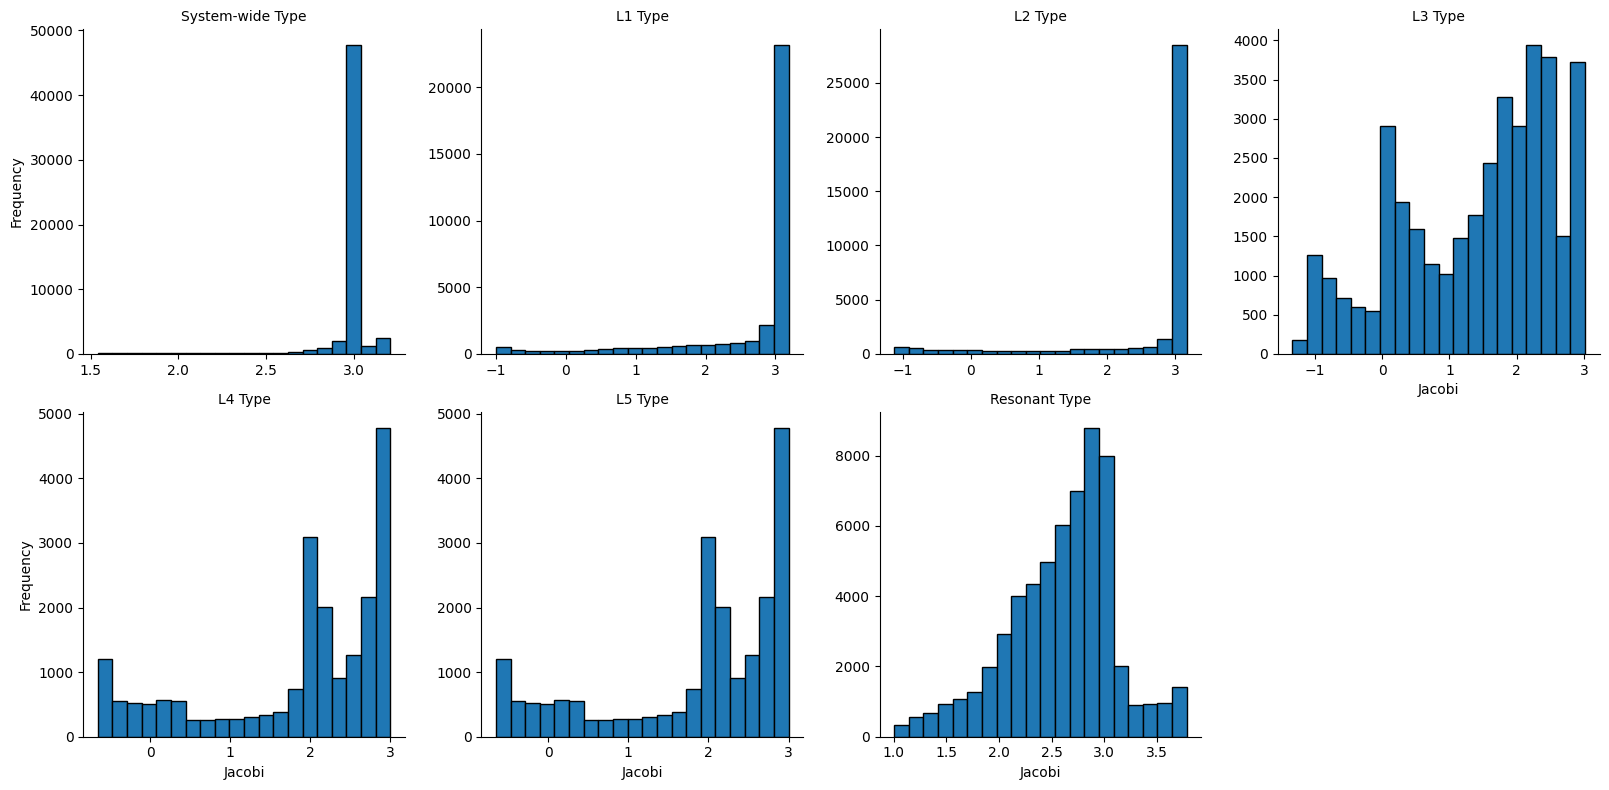

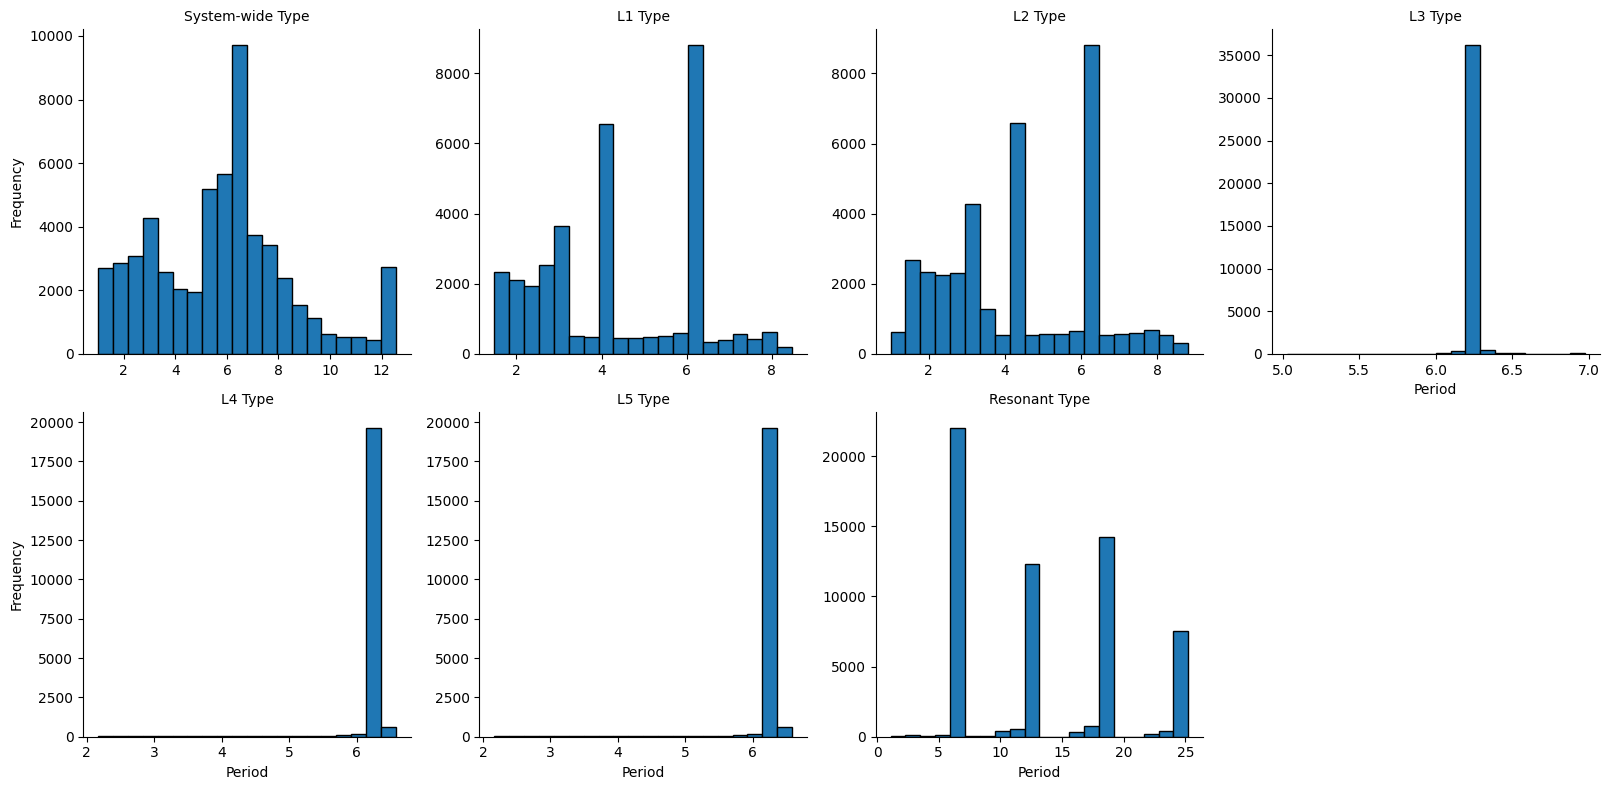

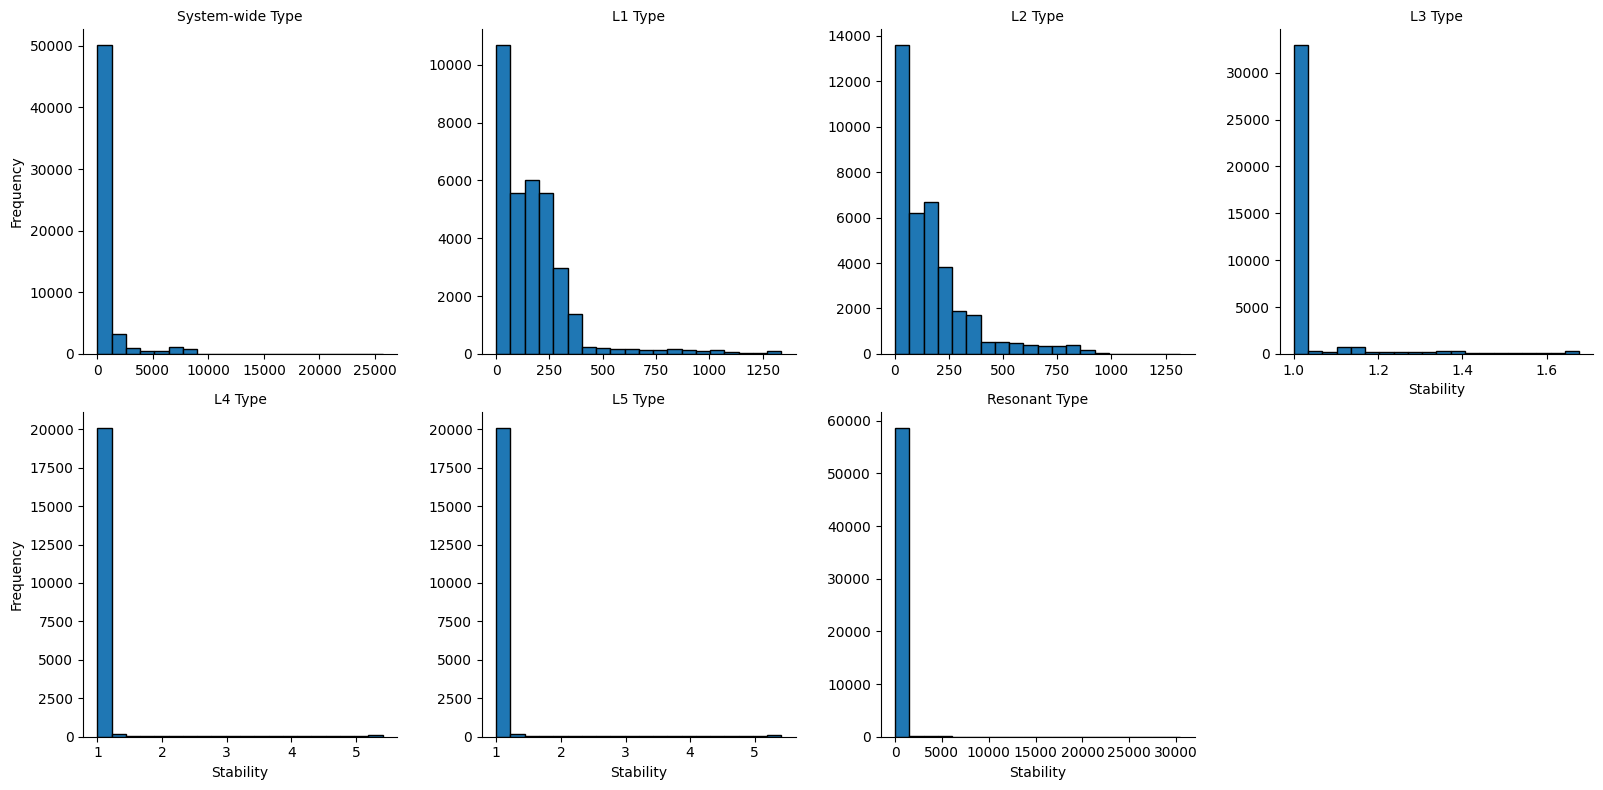

In [36]:
plot_grouped_features(df=orbit_df_with_classes, columns=['jacobi', 'period', 'stability'], group_col='Type', plot_type='facetgrid')

### By "Subfamily"

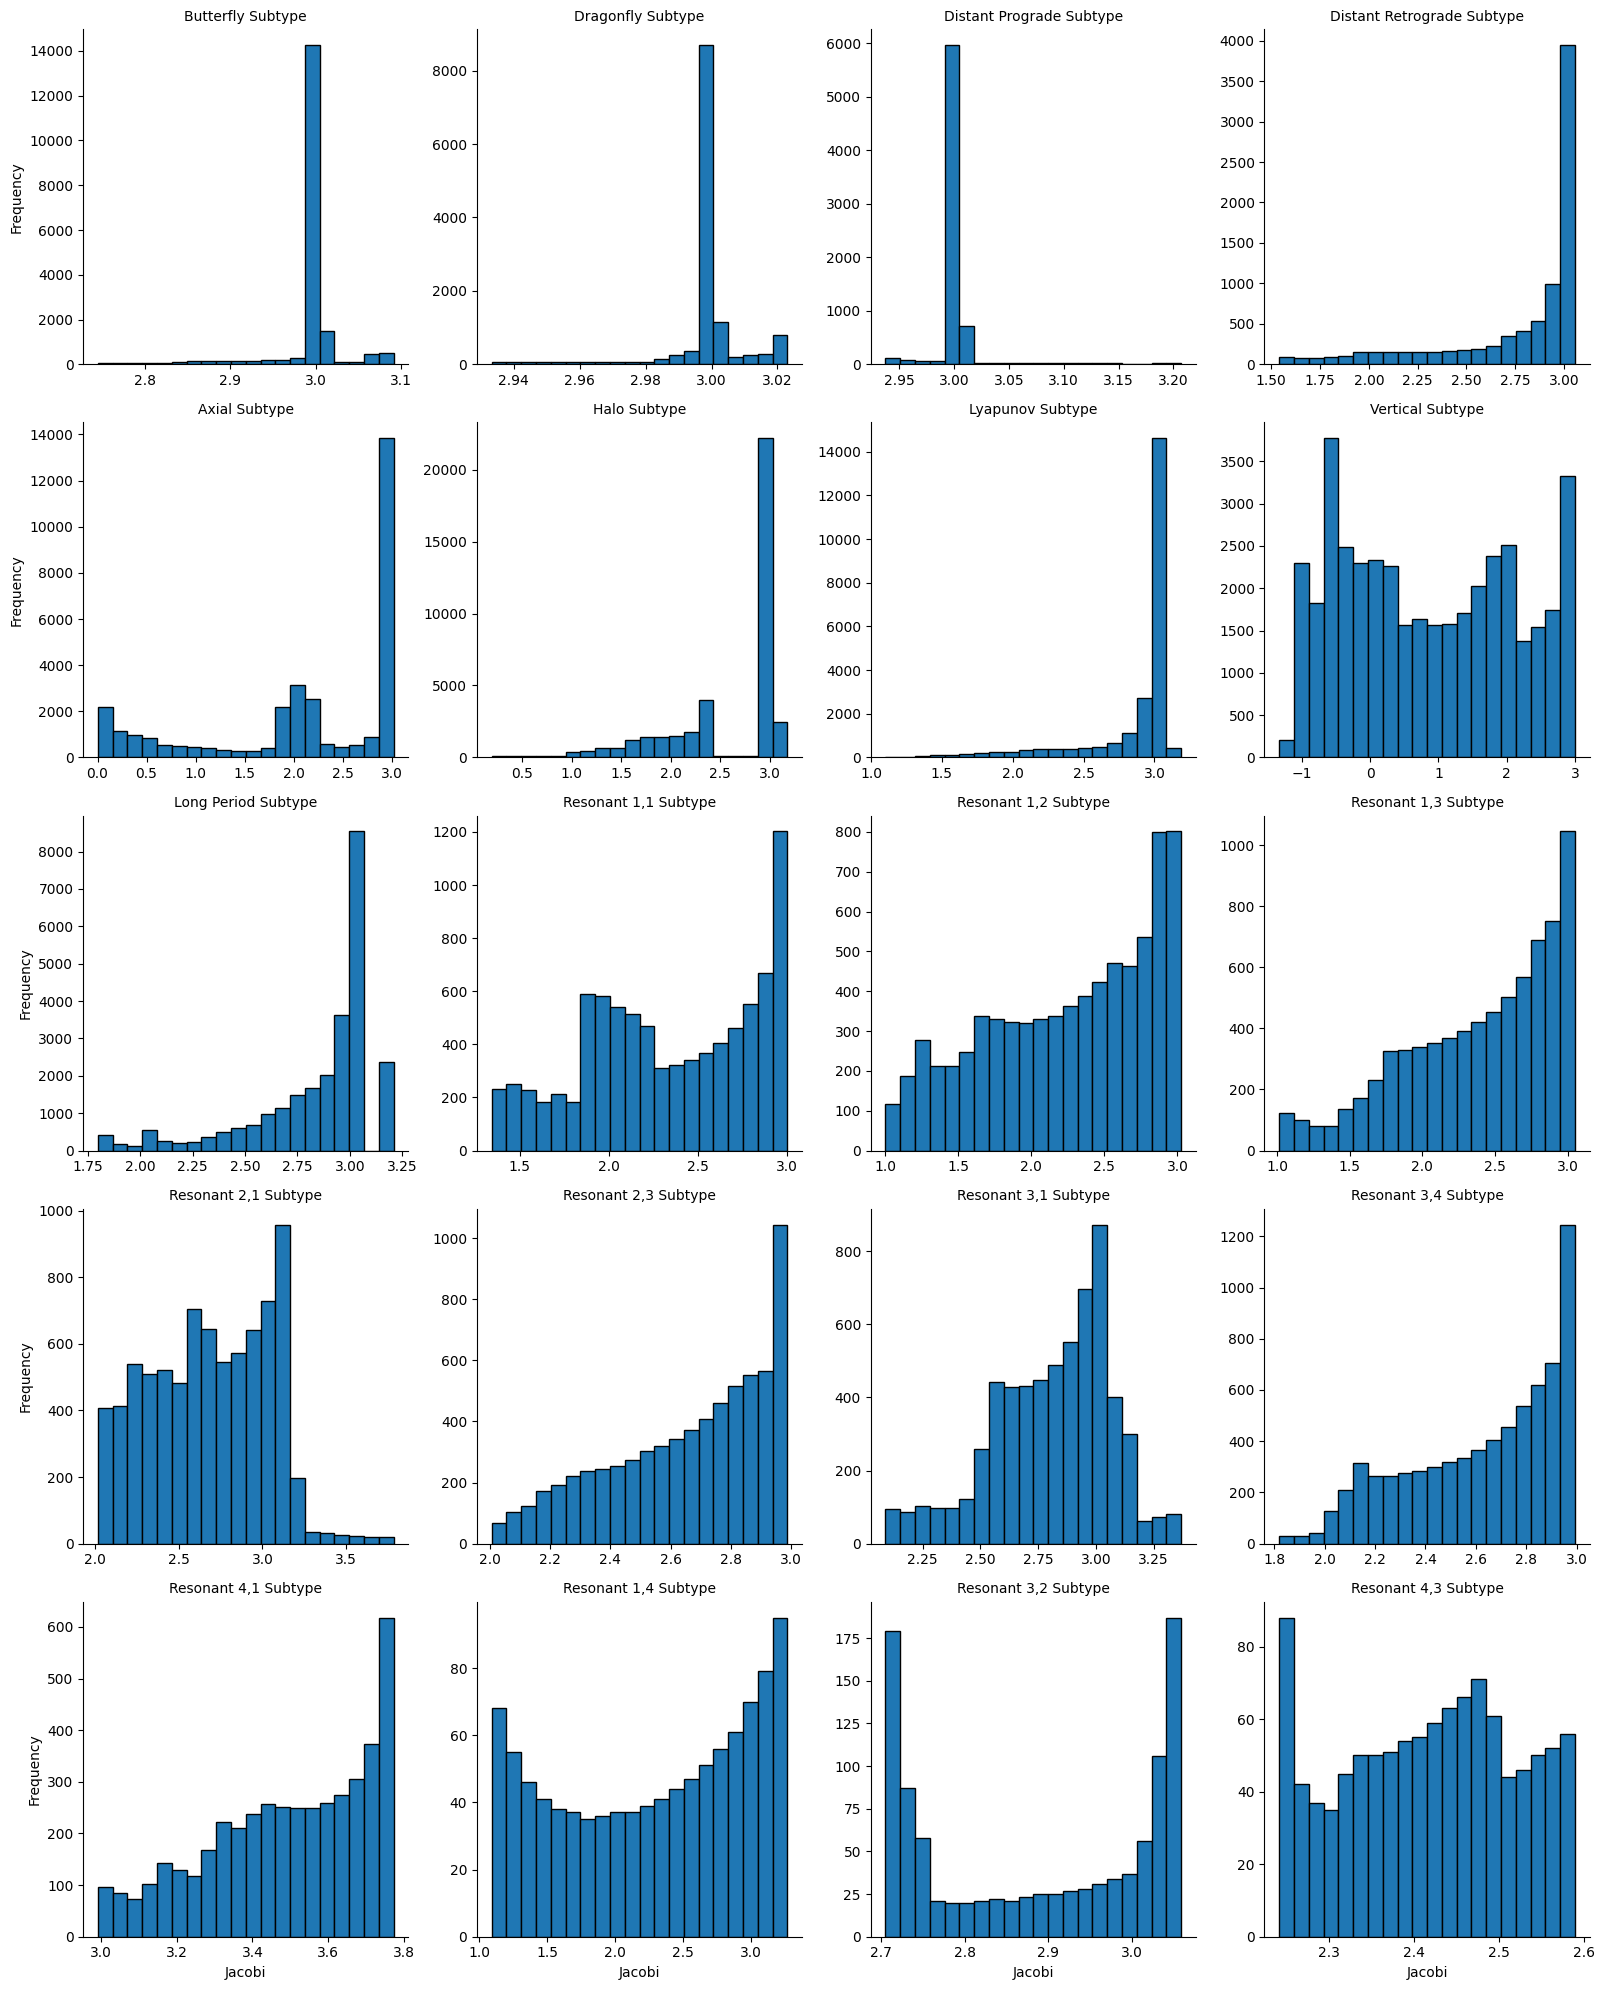

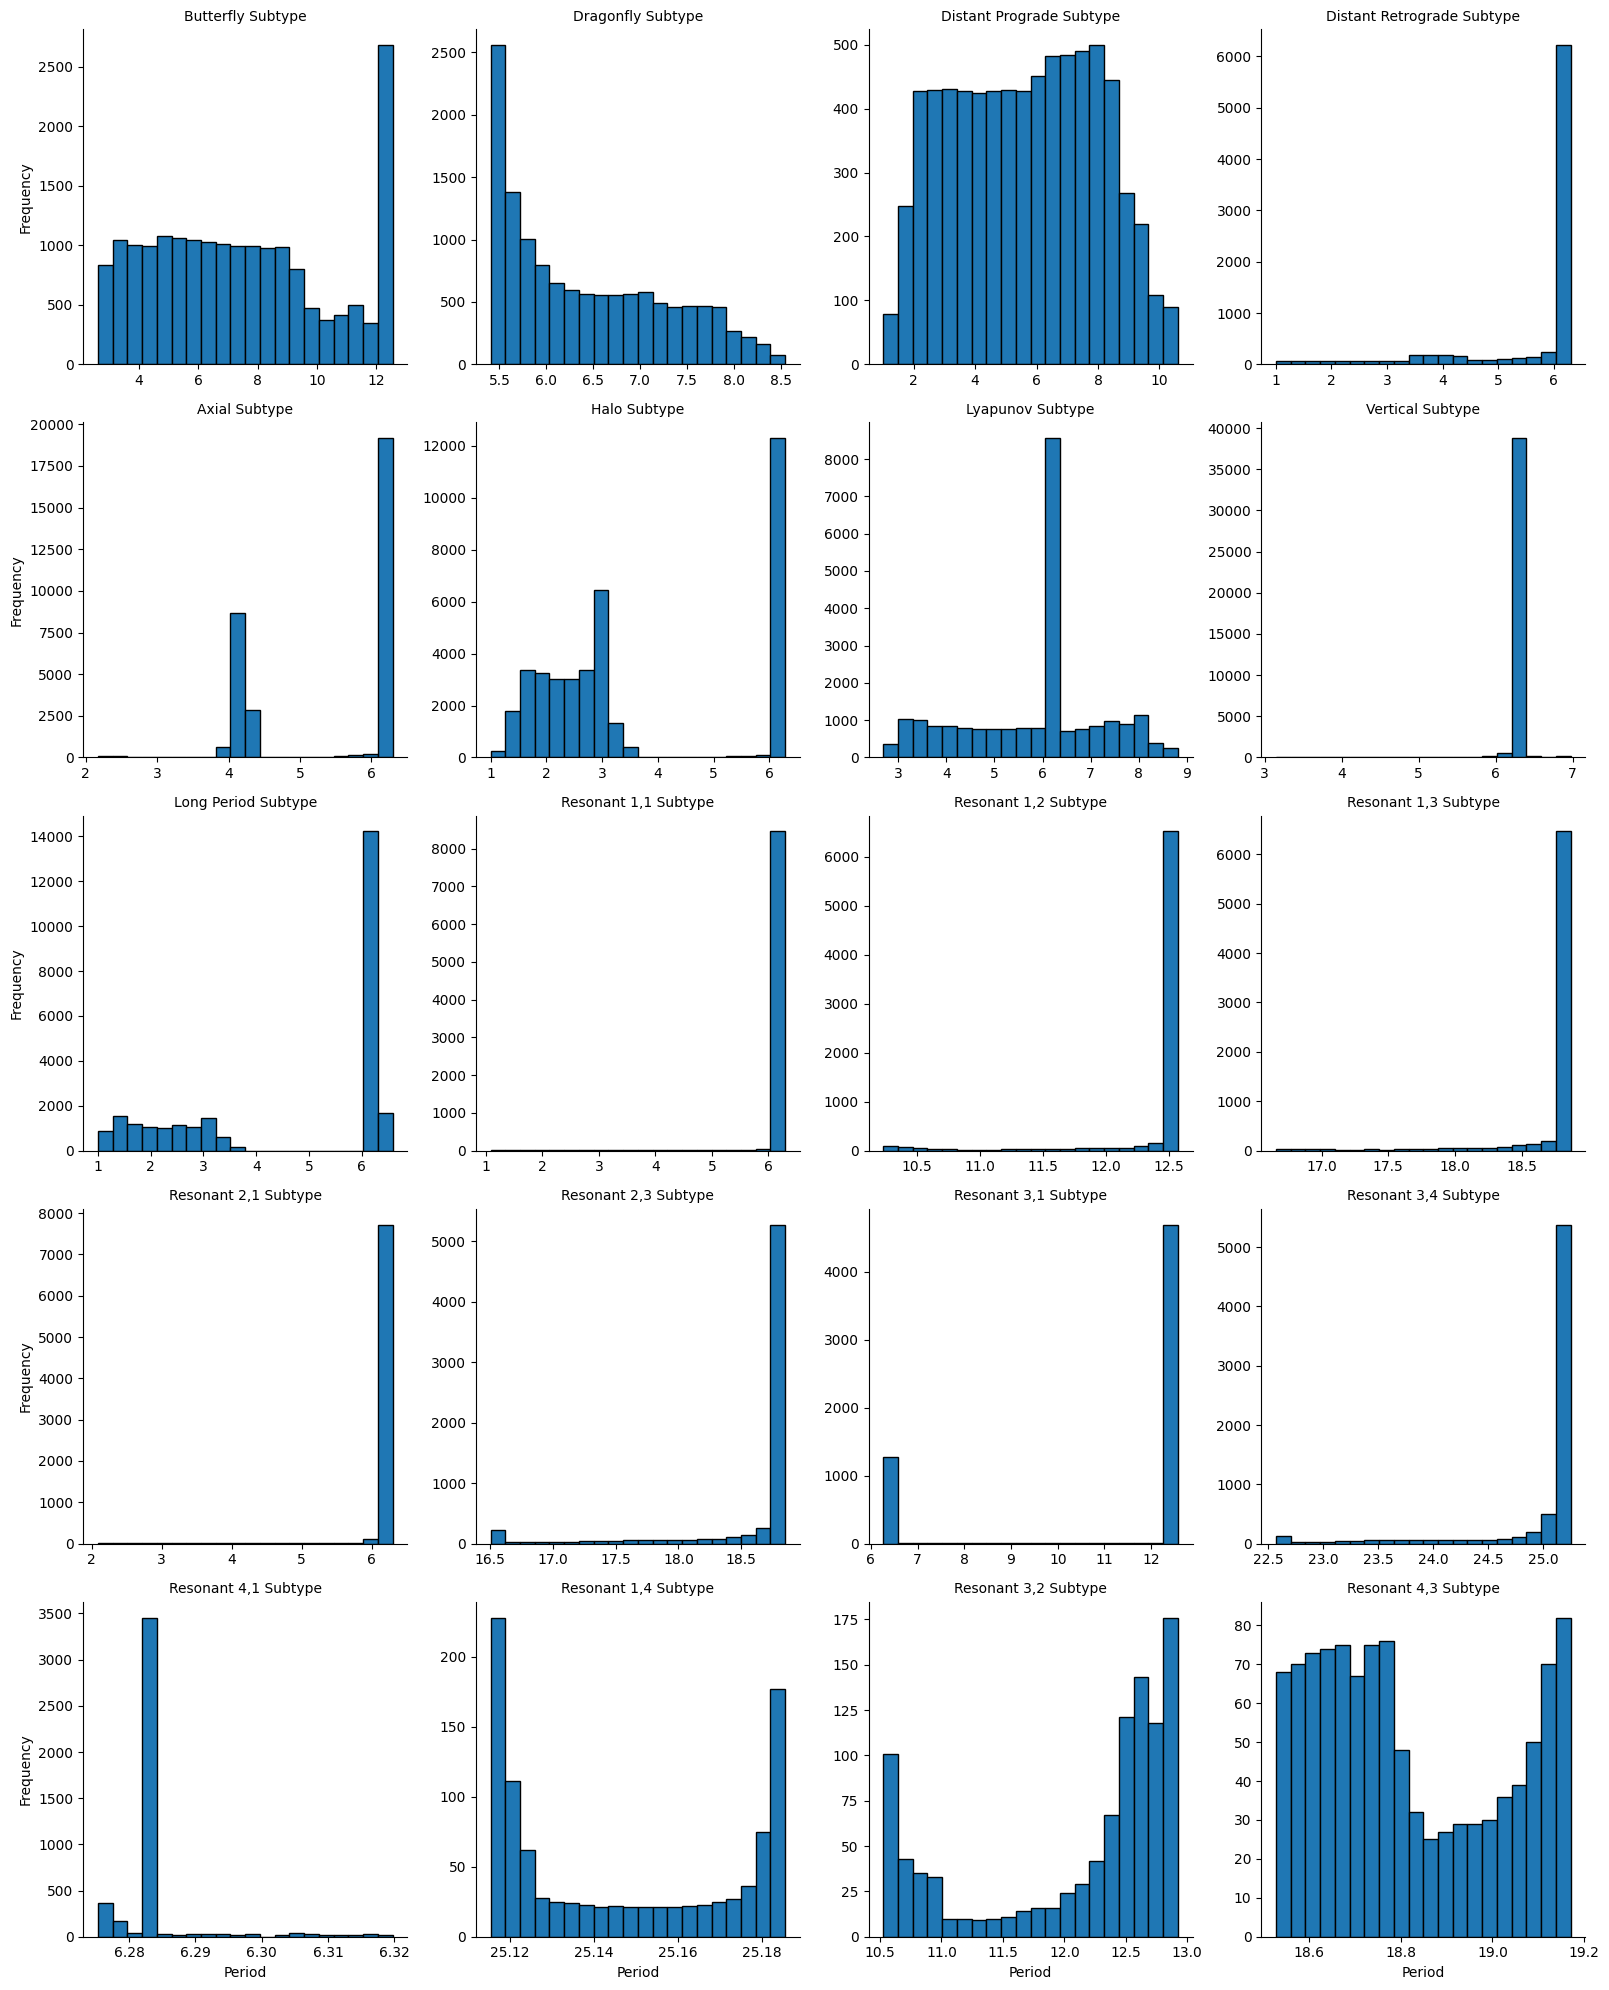

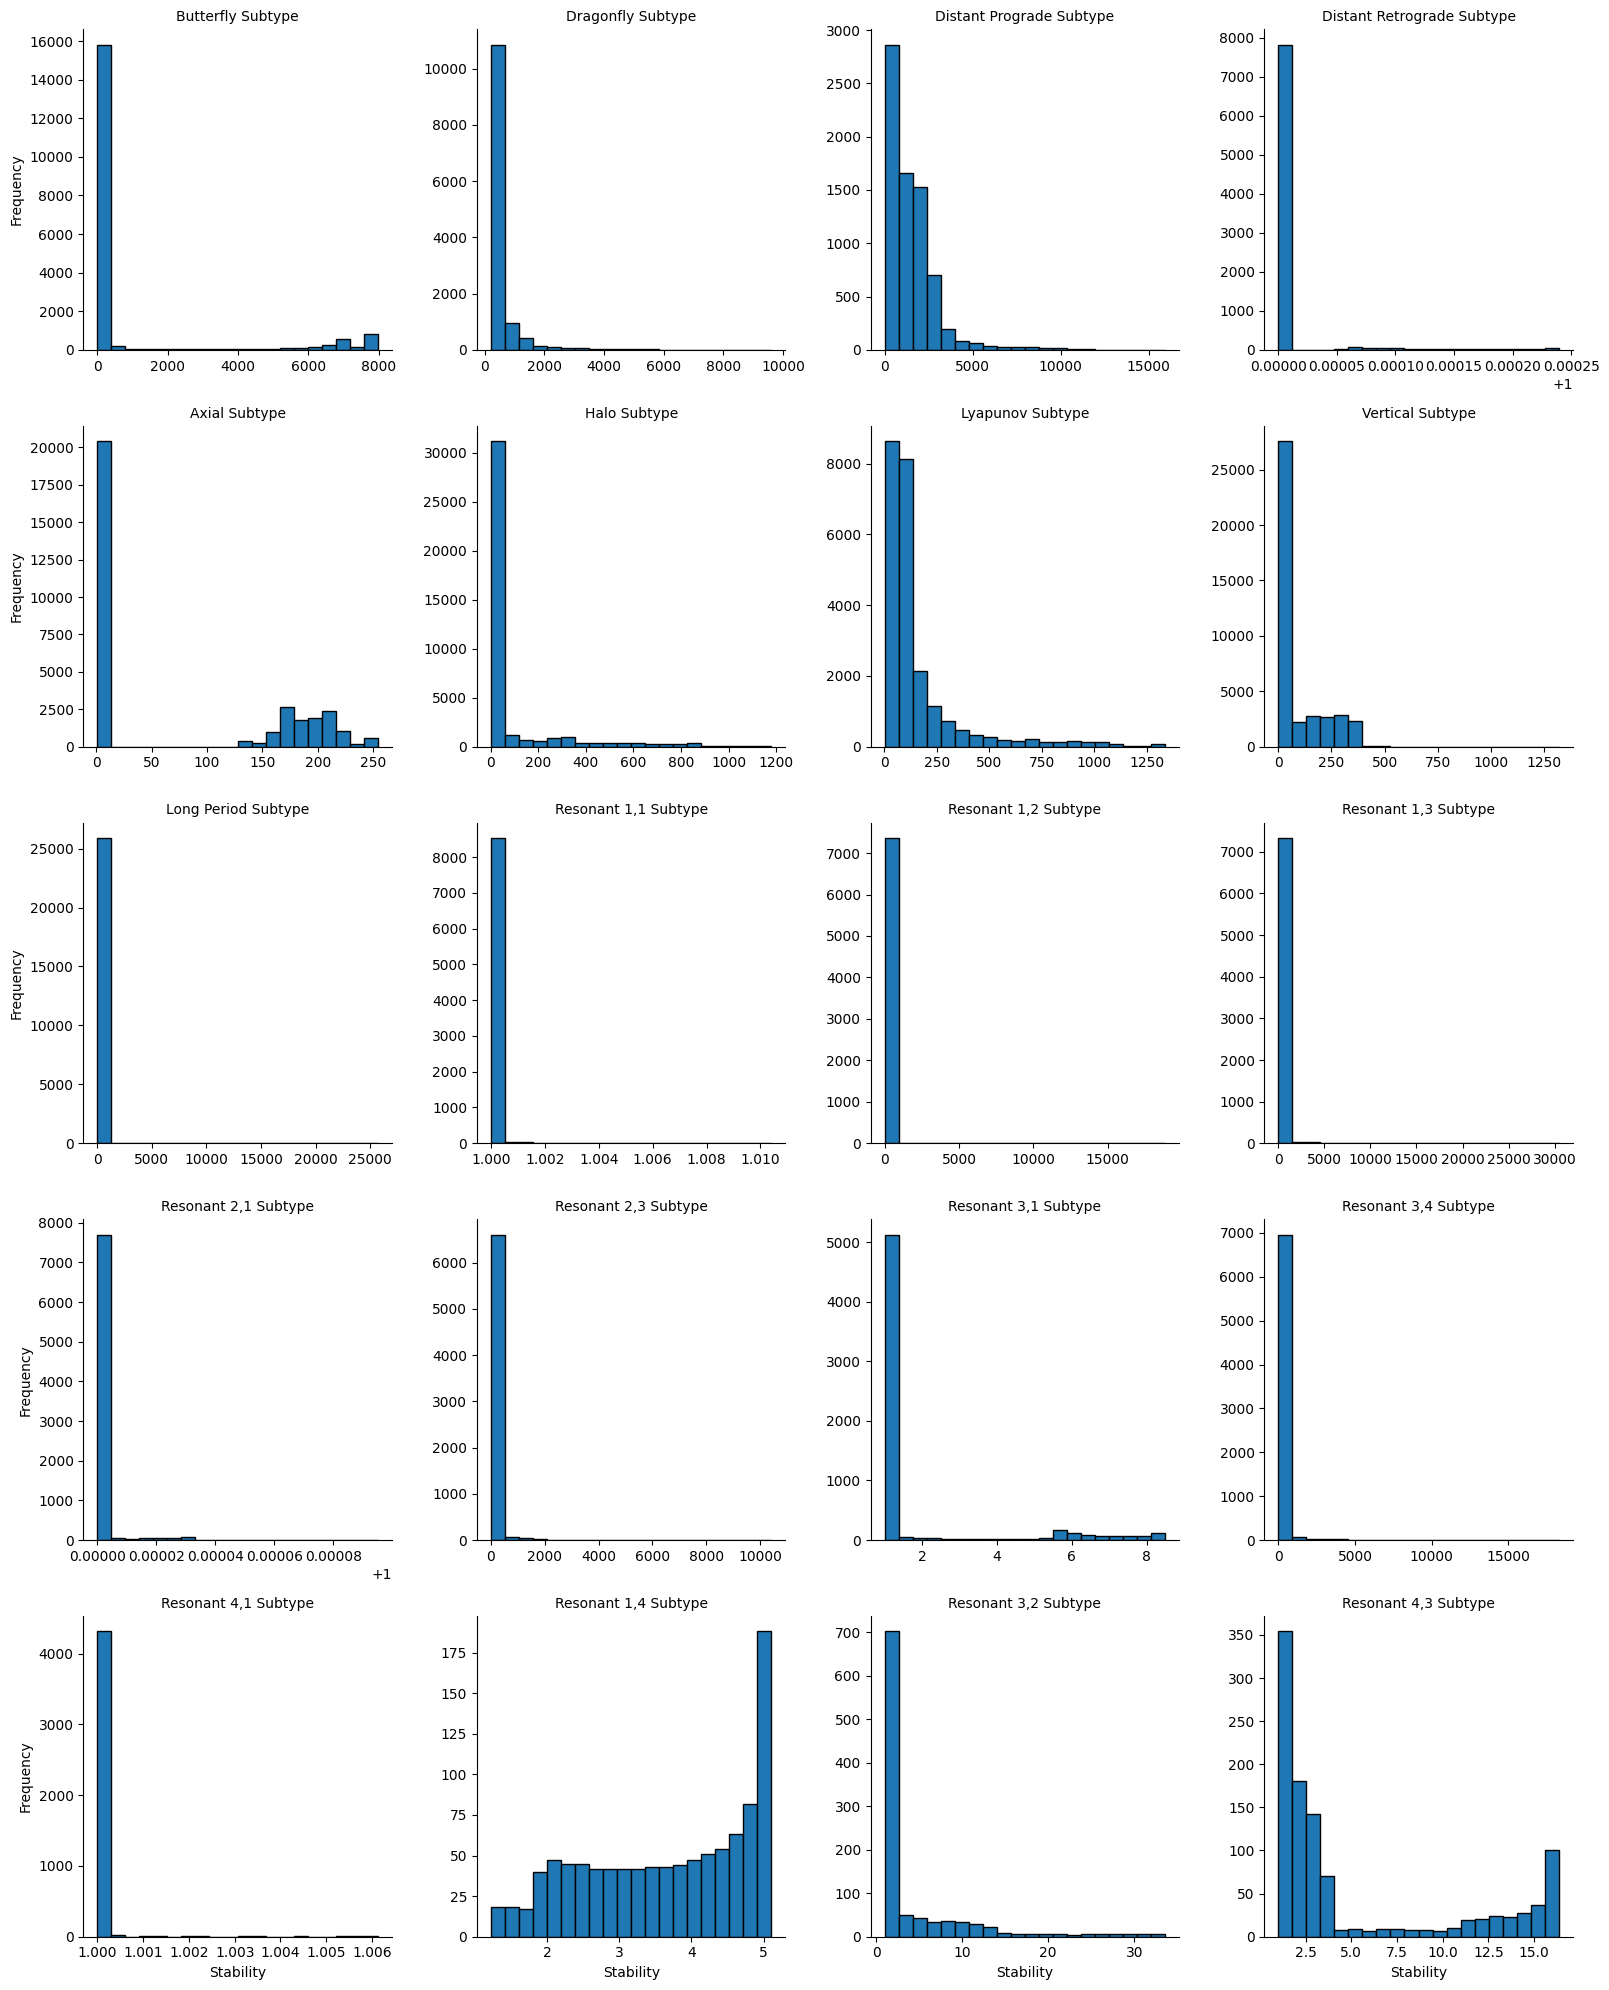

In [37]:
plot_grouped_features(df=orbit_df_with_classes, columns=['jacobi', 'period', 'stability'], group_col='Subtype', plot_type='facetgrid')

### By Direction

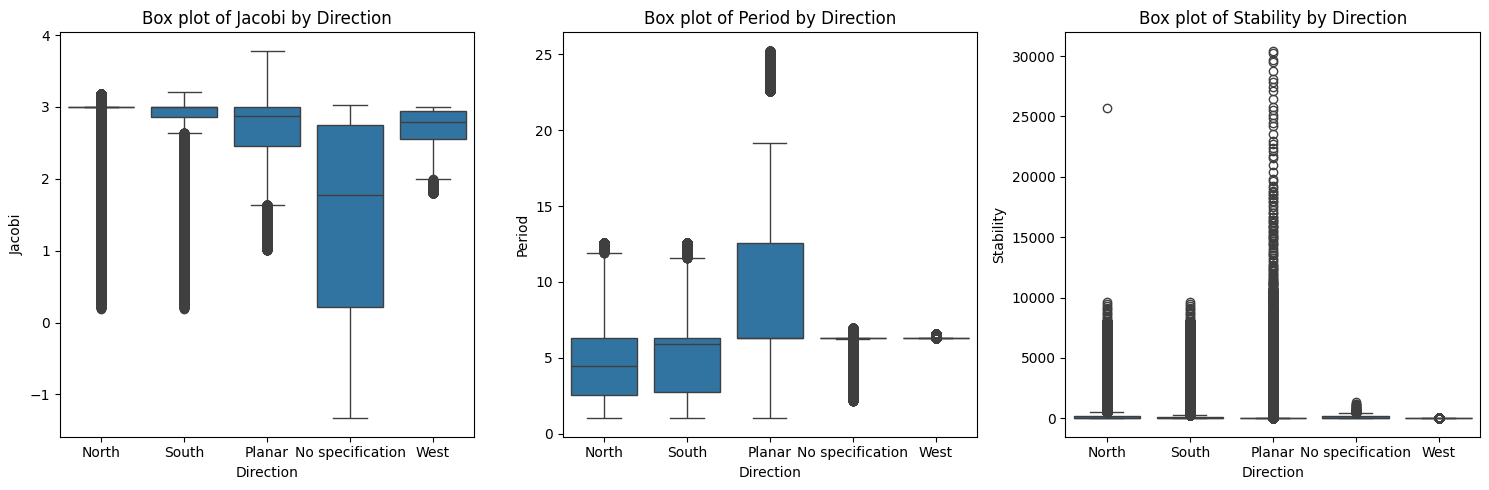

In [38]:
plot_grouped_features(df=orbit_df_with_classes, columns=['jacobi', 'period', 'stability'], group_col='Direction', plot_type='box')

## Propagated Errors

### Earth-Moon System

In [39]:
file_path = '/orbit-generation/data/orbits_dt_0_01/EM_dt_fix_0_01.h5'
orbits, orbit_df, orbits_ids, system_dict = get_segmented_dataset(file_path, segment_length=100)
orbits.shape

(1510484, 6, 100)

In [40]:
sampled_orbits, _ = sample_orbits(orbit_data=orbits, sample_spec=500)

In [41]:
errors = calculate_errors(sampled_orbits, MU, time_step=0.01)

In [ ]:
file_path = '/orbit-generation/data/orbits_fix_1500/EM_N_fix_1500.h5'
orbits, orbit_df, system_dict = get_first_period_dataset(file_path)
orbits.shape

(45211, 7, 1500)

In [ ]:
sampled_orbits, _ = sample_orbits(orbits, 250)

In [ ]:
errors = calculate_errors(sampled_orbits, MU)

KeyboardInterrupt: 